In [38]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import spacy
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
import re
from bs4 import BeautifulSoup
import nltk
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from matplotlib import pyplot
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
from keras.layers import Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow import keras
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to /home/enes/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/enes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
data = pd.read_csv('Reviews.csv', names=["Hotels", "Nicknames", "Date", "Review", "Rating"])
data.head()

,Hotels,Nicknames,Date,Review,Rating
0,La table Saint Thomas,505helenem,14 février 2021,"Challenge rempli, pour la St Valentin, nous so...",5
1,La table Saint Thomas,toufikh962,29 décembre 2020,Des fruits et des légumes de saisons dans un c...,4
2,La table Saint Thomas,Cathedralechartres,3 novembre 2020,Très bon restaurant avec de très bons produits...,4
3,La table Saint Thomas,guillaumedZ6459YZ,29 octobre 2020,Séduit par les avis Tripadvisor nous nous somm...,5
4,La table Saint Thomas,Willjess47,25 octobre 2020,super endroit le cadre est excellent . \nLe re...,5


In [23]:
df_filtered = data[data["Review"]!=3]
df_filtered.shape

(50438, 5)

In [24]:
df_filtered["Rating"] = df_filtered["Rating"].apply(lambda x : 1 if x>3 else 0)
df_filtered

,Hotels,Nicknames,Date,Review,Rating
0,La table Saint Thomas,505helenem,14 février 2021,"Challenge rempli, pour la St Valentin, nous so...",1
1,La table Saint Thomas,toufikh962,29 décembre 2020,Des fruits et des légumes de saisons dans un c...,1
2,La table Saint Thomas,Cathedralechartres,3 novembre 2020,Très bon restaurant avec de très bons produits...,1
3,La table Saint Thomas,guillaumedZ6459YZ,29 octobre 2020,Séduit par les avis Tripadvisor nous nous somm...,1
4,La table Saint Thomas,Willjess47,25 octobre 2020,super endroit le cadre est excellent . \nLe re...,1
...,...,...,...,...,...
50433,Casa Délice,Rony084,16 avril 2017,"très bon plats, bien variés, bien cuits.\nmême...",1
50434,Casa Délice,Ladiwilly T,17 octobre 2016,Je ne sais pas si c'est le fait d'être le seul...,0
50435,Casa Délice,Marie M,1 octobre 2016,"Commandée ma pizza à 23h15, heure d'arrivée es...",0
50436,Casa Délice,Fruit C,16 avril 2016,Tres bon acceuil.\nPate a pizza excellente\nLe...,1


Text(0.5, 1.0, 'Bar plot of sentiments')

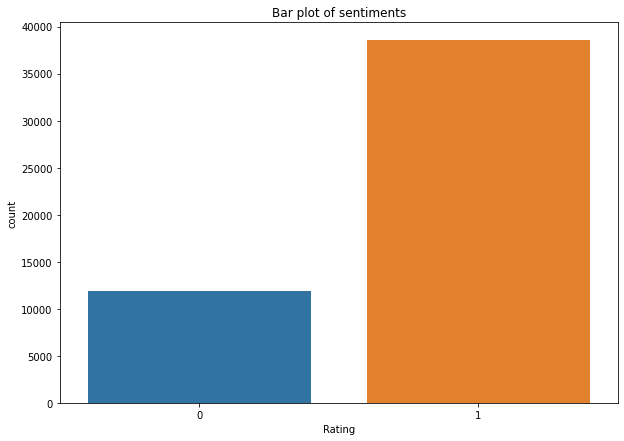

In [25]:
plt.figure(figsize = (10,7))
sns.countplot(df_filtered['Rating'])
plt.title("Bar plot of sentiments")

In [26]:
def decontract(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text


In [27]:

stop_words_fr = stopwords.words('french')
stop_words_fr = set(stop_words_fr)
stop_words_fr



{'ai',
 'aie',
 'aient',
 'aies',
 'ait',
 'as',
 'au',
 'aura',
 'aurai',
 'auraient',
 'aurais',
 'aurait',
 'auras',
 'aurez',
 'auriez',
 'aurions',
 'aurons',
 'auront',
 'aux',
 'avaient',
 'avais',
 'avait',
 'avec',
 'avez',
 'aviez',
 'avions',
 'avons',
 'ayant',
 'ayante',
 'ayantes',
 'ayants',
 'ayez',
 'ayons',
 'c',
 'ce',
 'ces',
 'd',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'es',
 'est',
 'et',
 'eu',
 'eue',
 'eues',
 'eurent',
 'eus',
 'eusse',
 'eussent',
 'eusses',
 'eussiez',
 'eussions',
 'eut',
 'eux',
 'eûmes',
 'eût',
 'eûtes',
 'furent',
 'fus',
 'fusse',
 'fussent',
 'fusses',
 'fussiez',
 'fussions',
 'fut',
 'fûmes',
 'fût',
 'fûtes',
 'il',
 'ils',
 'j',
 'je',
 'l',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'm',
 'ma',
 'mais',
 'me',
 'mes',
 'moi',
 'mon',
 'même',
 'n',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ont',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 's',
 'sa',
 'se',
 'sera',
 'serai',
 'seraient',
 'serais',
 'serait',


In [28]:

#stop_words= set((['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            #"you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            #'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            #'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            #'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            #'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            #'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            #'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            #'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            #'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            #'s', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            #'ve', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            #"hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            #"mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            #'won', "won't", 'wouldn', "wouldn't", ]) 


In [29]:
lemmatizer = WordNetLemmatizer()

In [30]:
def preprocess_text(review):
    review = re.sub(r"http\S+", "", review)             # removing website links
    review = BeautifulSoup(review, 'lxml').get_text()   # removing html tags
    review = decontract(review)                         # decontracting
    review = re.sub("\S*\d\S*", "", review).strip()     # removing the words with numeric digits
    review = re.sub('[^A-Za-z]+', ' ', review)          # removing non-word characters
    review = review.lower()                             # converting to lower case
    #review = [word for word in review.split(" ") if not word in stop_words]
    review = [word for word in review.split(" ") if not word in stop_words_fr] # removing stop words
    review = [lemmatizer.lemmatize(token, "v") for token in review] #Lemmatization
    review = " ".join(review)
    review.strip()
    return review
df_filtered['Review'] = df_filtered['Review'].apply(lambda x: preprocess_text(x))

In [31]:
df_filtered['Review'].head()

0    challenge rempli st valentin tomb amoureux men...
1    fruit gum saisons cadre charmant accueillant p...
2    tr bon restaurant tr bons produits frais tr bo...
3    duit avis tripadvisor laisser tenter vraiment ...
4    super endroit cadre excellent repas a tait par...
Name: Review, dtype: object

In [32]:
train_df, test_df = train_test_split(df_filtered, test_size = 0.2, random_state = 42)
print("Training data size : ", train_df.shape)
print("Test data size : ", test_df.shape)

Training data size :  (40350, 5)
Test data size :  (10088, 5)


In [33]:
def model_lstm():  
    top_words = 10000
    tokenizer = Tokenizer(num_words=top_words)
    tokenizer.fit_on_texts(train_df['Review'])
    list_tokenized_train = tokenizer.texts_to_sequences(train_df['Review'])

    max_review_length = 130
    X_train = pad_sequences(list_tokenized_train, maxlen=max_review_length)
    y_train = train_df['Rating']


    embedding_vecor_length = 32
    model = Sequential()
    model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
    model.add(LSTM(200))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    lstm = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
    
model_lstm()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 130, 32)           320032    
_________________________________________________________________
lstm (LSTM)                  (None, 200)               186400    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 506,633
Trainable params: 506,633
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
505/505 [==============================] - 364s 713ms/step - loss: 0.3940 - accuracy: 0.8311 - val_loss: 0.2454 - val_accuracy: 0.9006
Epoch 2/10
505/505 [==============================] - 351s 696ms/step - loss: 0.2106 - accuracy: 0.9205 - val_loss: 0.2518 - val_accuracy: 0.8976
Epoch 3/10
505/505 [==============================] - 339s 672ms/step - loss: 0.1753 - a

In [37]:
list_tokenized_test = tokenizer.texts_to_sequences(test_df['Review'])
X_test = pad_sequences(list_tokenized_test, maxlen=max_review_length)
y_test = test_df['Rating']
prediction = model.predict(X_test)
y_pred = (prediction > 0.5)
print("Accuracy of the model : ", accuracy_score(y_pred, y_test))
print('F1-score: ', f1_score(y_pred, y_test))
print('Confusion matrix:')
confusion_matrix(y_test,y_pred)
#sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap=sns.color_palette('viridis'))
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
sns.heatmap(confusion_matrix(y_test,y_pred), 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

NameError: name 'tokenizer' is not defined

In [ ]:
def save_model(model, dir='output'):
    os.mkdir(dir)
    try:
        model.save_weights('/home/enes/resto_sentiment/lstm_model.hd5')
    except FileExistsError:
        pass
    
    model.save_weights('/home/enes/resto_sentiment/lstm_model.hd5')

In [ ]:
def load_model(dir='output'):
    model = model_lstm()
    model.load_weights(os.path.join(dir, '/home/enes/resto_sentiment/lstm_model.hd5'))
    return model

In [ ]:
def tokenize_review(test_review):
    test_review = test_review.lower()
    # get rid of punctuation
    test_review = re.sub('[^A-Za-z]+', ' ', test_review)

    # splitting by spaces
    test_words = test_review.split()

    


def predict(net, test_review, sequence_length=200):
    print(type(test_review))
    # tokenize review
    test_ints = tokenize_review(test_review)
    
    top_words = 3000
    tokenizer = Tokenizer(num_words=top_words)
    tokenizer.fit_on_texts(test_review)
    list_tokenized_train = tokenizer.texts_to_sequences(test_review)
    
    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features([test_ints], seq_length)
    
    # convert to tensor to pass into your model
    feature_tensor = tf.cast(features, tf.float32)
    
    batch_size = 1
        
    # get the output from the model
    pred = net(feature_tensor)
    
    # convert output probabilities to predicted class (0 or 1)
    # printing output value, before rounding
    return pred

In [ ]:
your_review = input()
pred = predict(model, your_review)
pred.numpy()[0]

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

In [ ]:
wordcloud = WordCloud(max_words=5000, background_color="white").generate(str(df_filtered.Review))
plt.figure(figsize=(20, 40))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()